# <center> <span style="font-family:Roboto Mono;">1.Imports</span> <center/>

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("/kaggle/input/students-grading-dataset/Students_Grading_Dataset.csv")


<hr>

# <center> <span style="font-family:Roboto Mono;">2.Data Exploration</span> <center/>

In [3]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [4]:
print(df.dtypes)

Student_ID                     object
First_Name                     object
Last_Name                      object
Email                          object
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object


In [5]:
df.isnull().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

<div class="alert alert-block alert-danger">  
<b>Note: </b>Null values detected , will be fixed later on. 
</div>

In [6]:
df.nunique()  

Student_ID                    5000
First_Name                       8
Last_Name                        6
Email                         5000
Gender                           2
Age                              7
Department                       4
Attendance (%)                2980
Midterm_Score                 3409
Final_Score                   3371
Assignments_Avg               2993
Quizzes_Avg                   3173
Participation_Score            997
Projects_Score                3141
Total_Score                   3171
Grade                            5
Study_Hours_per_Week           251
Extracurricular_Activities       2
Internet_Access_at_Home          2
Parent_Education_Level           4
Family_Income_Level              3
Stress_Level (1-10)             10
Sleep_Hours_per_Night           51
dtype: int64

<div class="alert alert-block alert-info">
<b>Note: </b> To make sure we don't have double entries.
</div>

In [7]:
df["Student_ID"].drop_duplicates() 

0       S1000
1       S1001
2       S1002
3       S1003
4       S1004
        ...  
4995    S5995
4996    S5996
4997    S5997
4998    S5998
4999    S5999
Name: Student_ID, Length: 5000, dtype: object

<hr>

# <center> <span style="font-family:Roboto Mono;">3.Data Integrity,Consistency & outliers Checks</span> <center/>

### <center> <span style="font-family:Roboto Mono;">3.1.Data Range Check</span> <center/>

In [8]:
numerical_data = df.select_dtypes(include= [np.number])

In [9]:
max_values = numerical_data.max()
min_values = numerical_data.min() 

<div class="alert alert-block alert-info">
<b>Note: </b>Put the results in a dataframe for better readability.
</div>

In [10]:
result = pd.DataFrame({'Max Values': max_values, 'Min Values': min_values})
print(result)

                       Max Values  Min Values
Age                         24.00       18.00
Attendance (%)             100.00       50.01
Midterm_Score               99.98       40.00
Final_Score                 99.98       40.00
Assignments_Avg             99.98       50.00
Quizzes_Avg                 99.96       50.03
Participation_Score         10.00        0.00
Projects_Score             100.00       50.01
Total_Score                 99.99       50.02
Study_Hours_per_Week        30.00        5.00
Stress_Level (1-10)         10.00        1.00
Sleep_Hours_per_Night        9.00        4.00


### <center> <span style="font-family:Roboto Mono;">3.2.Grade vs Total score consistency </span> <center/>

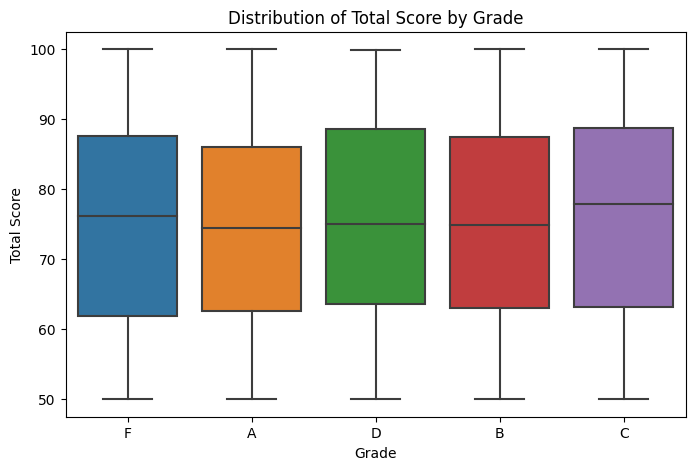

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Grade', y='Total_Score', data=df)
plt.xlabel("Grade")
plt.ylabel("Total Score")
plt.title("Distribution of Total Score by Grade")
plt.show()

<div class="alert alert-block alert-danger">  
<b>Note: </b>Inconsistencies  detected , will be fixed later on. 
</div>


### <center> <span style="font-family:Roboto Mono;">3.3.Outlier Detection</span> <center/>

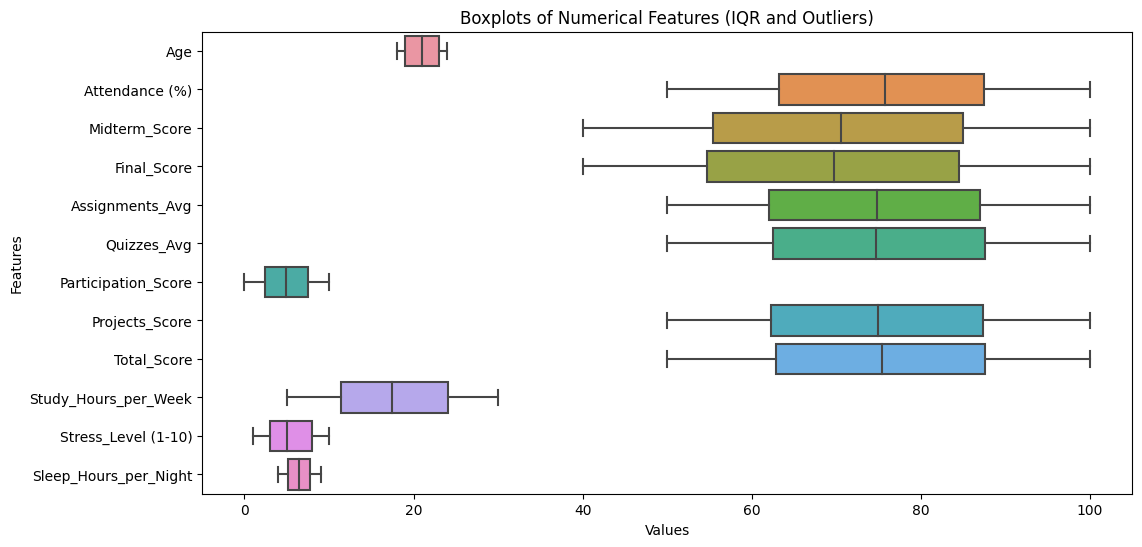

In [12]:
numerical_cols= df.select_dtypes(include= [np.number]).columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], orient='h')  # Horizontal boxplot for better readability
plt.title("Boxplots of Numerical Features (IQR and Outliers)")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

<hr>

# <center> <span style="font-family:Roboto Mono;">4.Data Cleaning</span> <center/>

### <center> <span style="font-family:Roboto Mono;">4.1.Remove unnecessary columns</span> <center/>

In [13]:
df.drop(columns =['Student_ID','First_Name','Last_Name','Email'], inplace = True)

In [14]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


### <center> <span style="font-family:Roboto Mono;">4.2.Data Imputation</span> <center/>

In [15]:
#1.for numericla values we will replace null values by the mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['Attendance (%)', 'Assignments_Avg']]= imp.fit_transform(df[['Attendance (%)', 'Assignments_Avg']])


In [16]:
#2.for categorical ones , we will replace them by most recent 
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['Parent_Education_Level']] = imp1.fit_transform(df[['Parent_Education_Level']])

### <center> <span style="font-family:Roboto Mono;">4.3.Fixing inconsistencies </span> <center/>

In [17]:
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

df['Grade'] = pd.cut(df['Total_Score'], bins=bins, labels=labels, right=False)

<hr>

### <center> <span style="font-family:Roboto Mono; color:red;">Data Check</span> <center/>

In [18]:
df.isnull().sum()

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


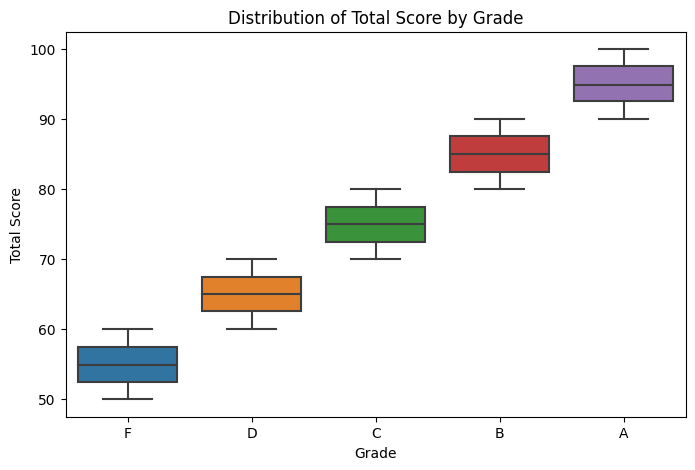

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Grade', y='Total_Score', data=df)
plt.xlabel("Grade")
plt.ylabel("Total Score")
plt.title("Distribution of Total Score by Grade")
plt.show()

<div class="alert alert-block alert-success">  
<b></b>Now our data is clean and consistent.  
</div>

-------------------------------

# <center> <span style="font-family:Roboto Mono;">5.Data Analysis</span> <center/>

### <center> <span style="font-family:Roboto Mono;">5.1.General Data Analysis</span> <center/>

In [20]:
# Pastel color palette
pastel_colors = ['#FFB6C1', '#87CEEB', '#FFD700', '#98FB98', '#DDA0DD', '#FFA07A', '#87CEFA', '#FF69B4', '#20B2AA', '#F0E68C']

# Function to create pie charts with pastel colors
def create_pie_chart(data, column, title):
    counts = data[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors[:len(counts)])
    plt.title(title)
    plt.show()

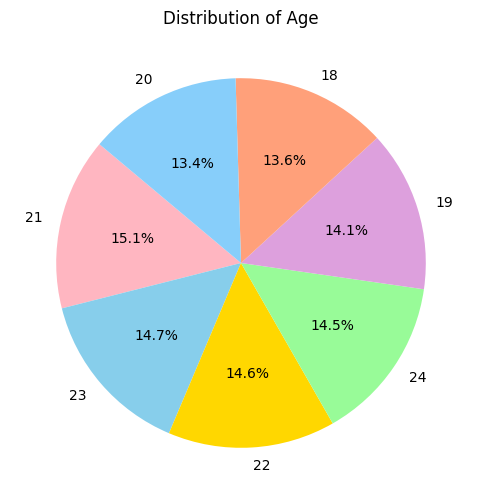

In [21]:
# 1. Distribution of Age
create_pie_chart(df, 'Age', 'Distribution of Age')

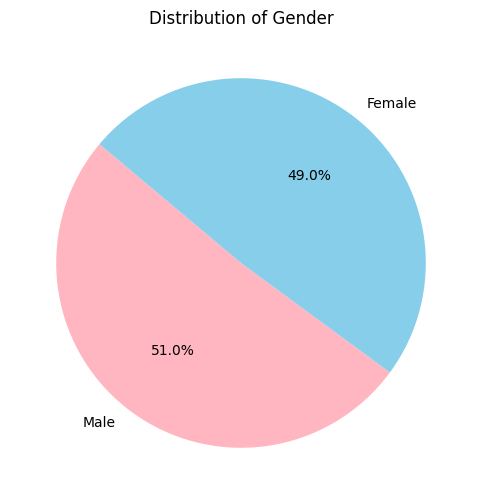

In [22]:
# 2. Distribution of Gender
create_pie_chart(df, 'Gender', 'Distribution of Gender')

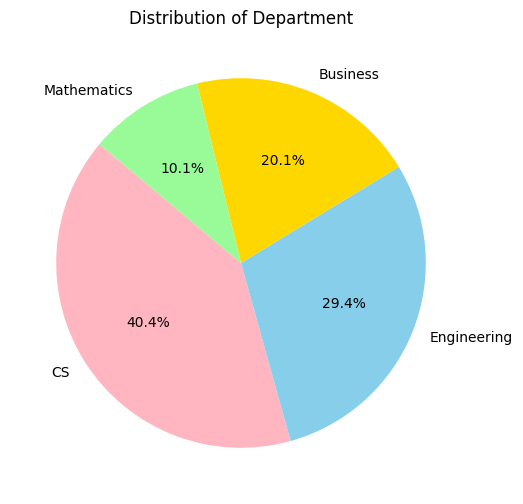

In [23]:
# 3. Distribution of Department
create_pie_chart(df, 'Department', 'Distribution of Department')

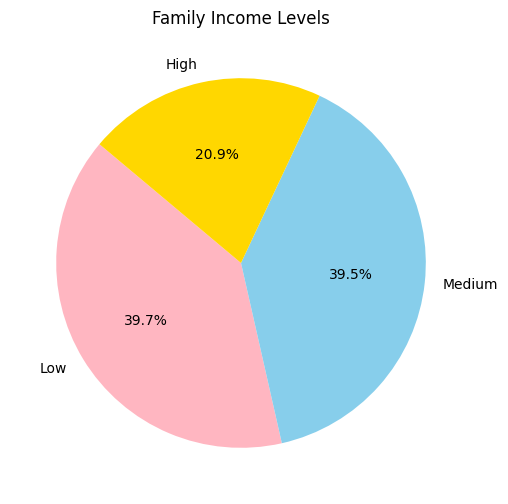

In [24]:
# 4. Percentage of students in different Family Income Levels
create_pie_chart(df, 'Family_Income_Level', 'Family Income Levels')

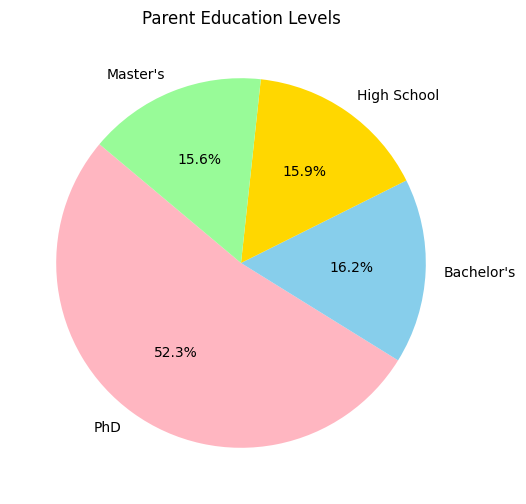

In [25]:
# 5. Percentage of students in different Parent Education Levels
create_pie_chart(df, 'Parent_Education_Level', 'Parent Education Levels')

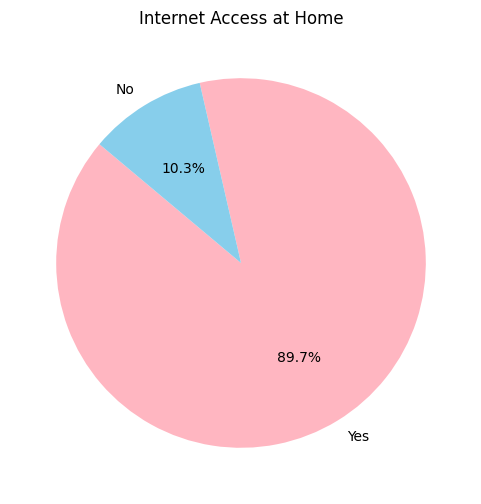

In [26]:
# 6. Breakdown of students with and without Internet Access at Home
create_pie_chart(df, 'Internet_Access_at_Home', 'Internet Access at Home')

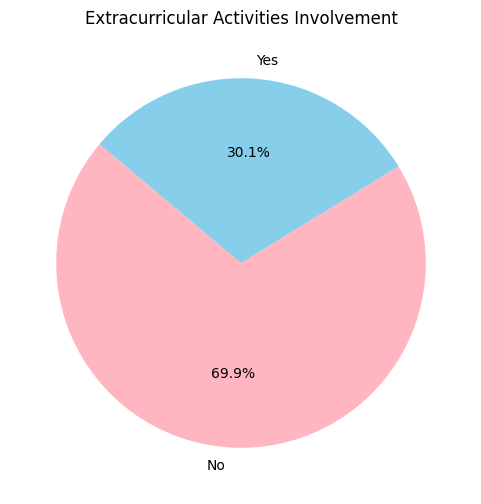

In [27]:
# 7. Proportion of students involved in Extracurricular Activities
create_pie_chart(df, 'Extracurricular_Activities', 'Extracurricular Activities Involvement')

### <center> <span style="font-family:Roboto Mono;">5.2. Academic Performance Analysis</span> <center/>

### <center> <span style="font-family:Roboto Mono;">5.2.1 Grade Distributions</span> <center/>

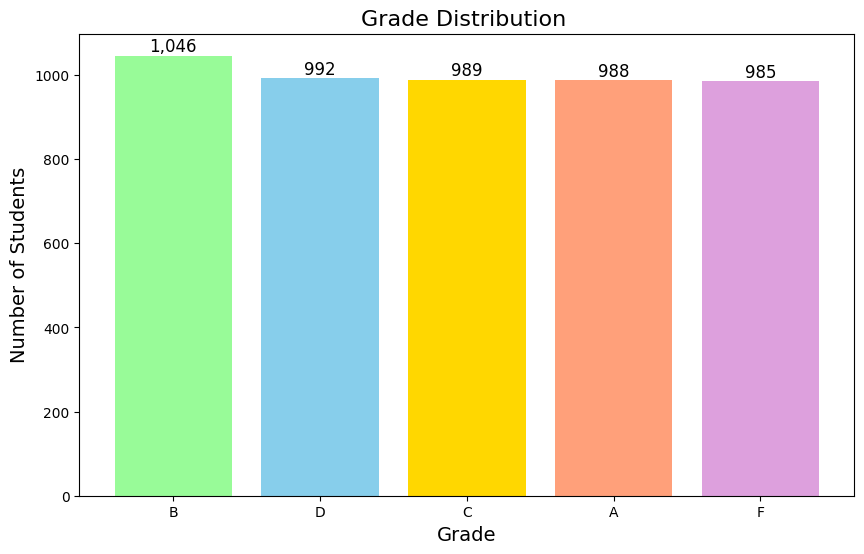

In [28]:
grade_counts = df['Grade'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(grade_counts.index, grade_counts, color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}', 
             ha='center', va='bottom', fontsize=12)

plt.title('Grade Distribution ', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.show()

<ipython-input-29-2a9c95e3b5be>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Department', 'Grade']).size().unstack()


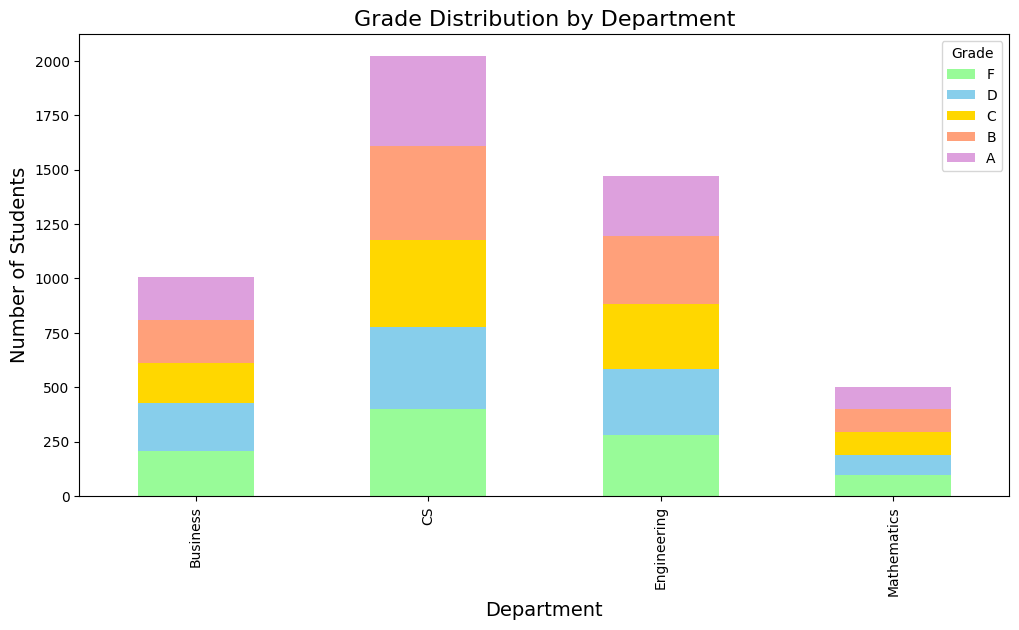

In [29]:
grade_by_department = df.groupby(['Department', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<ipython-input-30-364019409524>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Gender', 'Grade']).size().unstack()


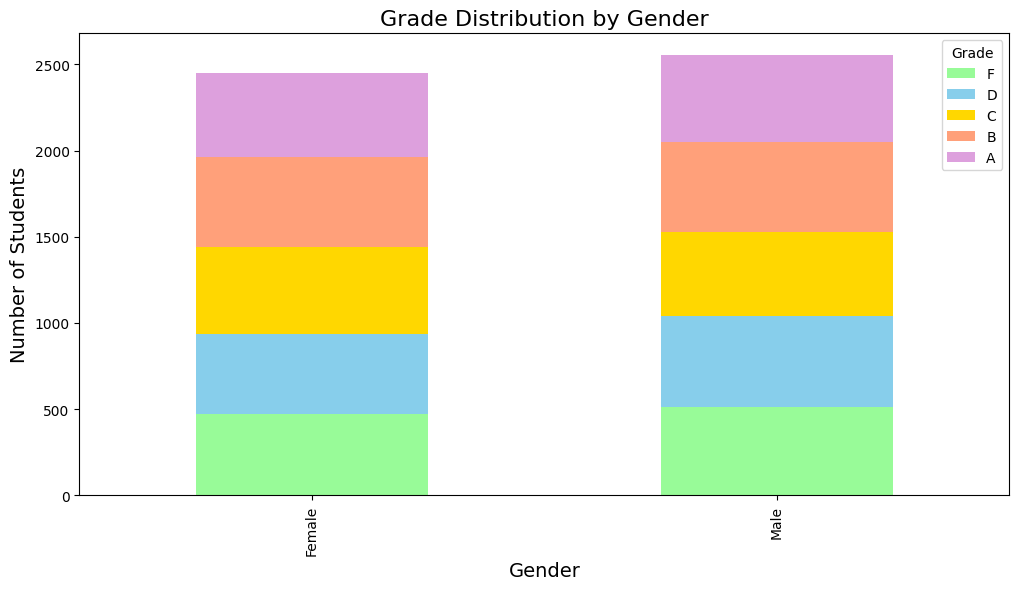

In [30]:
grade_by_department = df.groupby(['Gender', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<ipython-input-31-df163e166123>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Internet_Access_at_Home', 'Grade']).size().unstack()


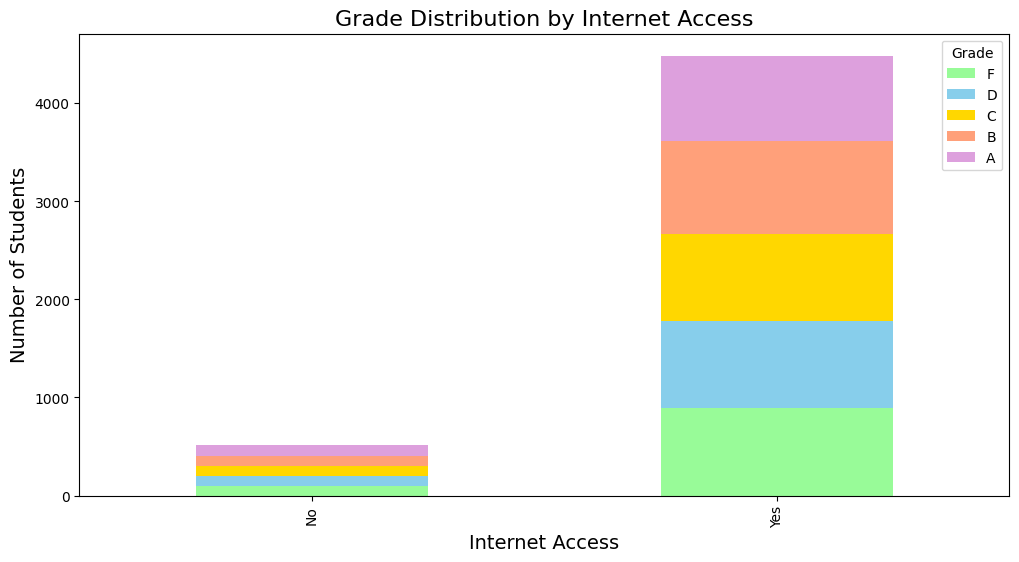

In [31]:
grade_by_department = df.groupby(['Internet_Access_at_Home', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution by Internet Access', fontsize=16)
plt.xlabel('Internet Access', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<ipython-input-32-483b52d8e460>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Age', 'Grade']).size().unstack()


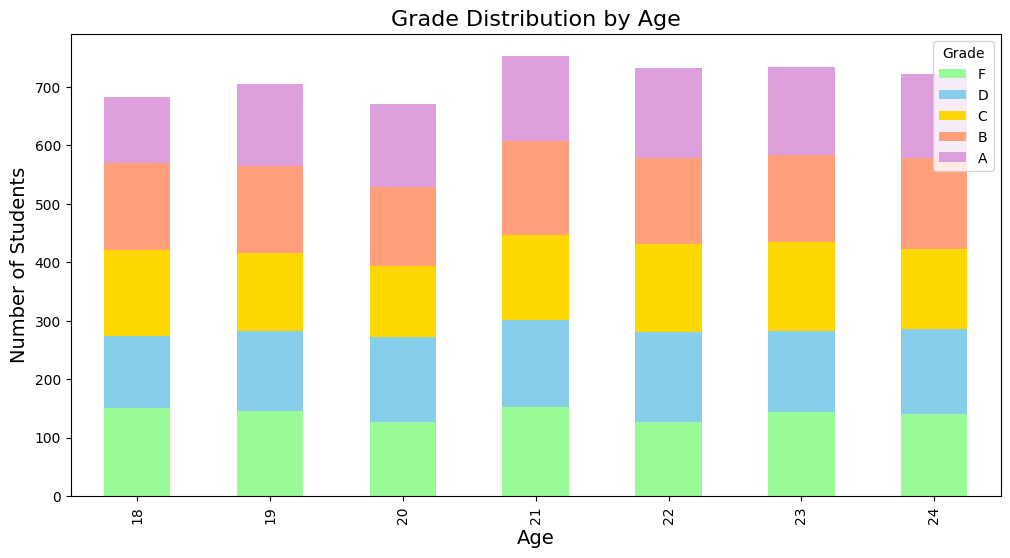

In [32]:
grade_by_department = df.groupby(['Age', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<ipython-input-33-eec5065ec73a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Family_Income_Level', 'Grade']).size().unstack()


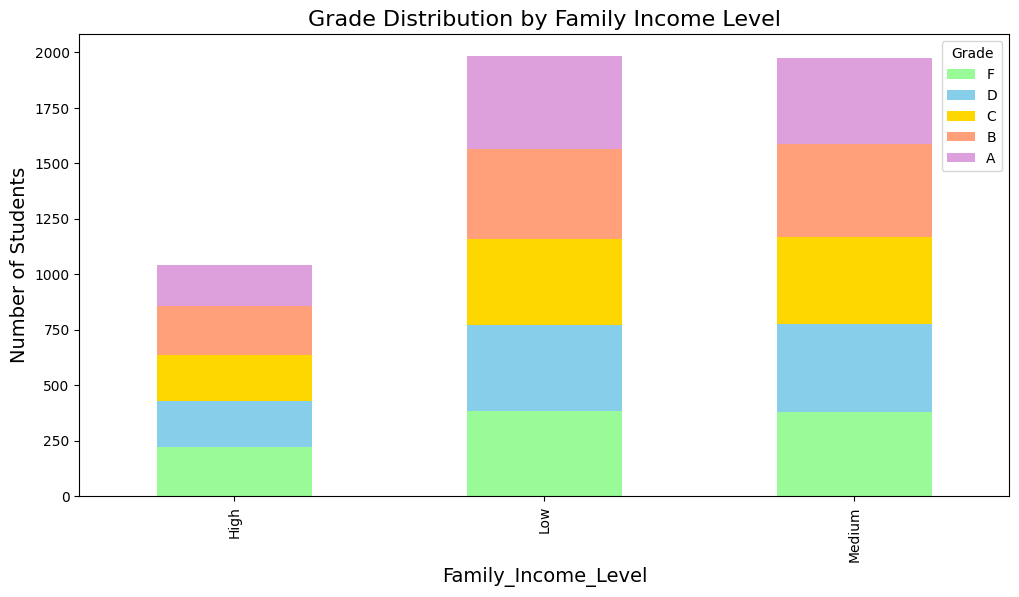

In [33]:
grade_by_department = df.groupby(['Family_Income_Level', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution by Family Income Level', fontsize=16)
plt.xlabel('Family_Income_Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<ipython-input-34-9511d8ec65ff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Stress_Level (1-10)', 'Grade']).size().unstack()


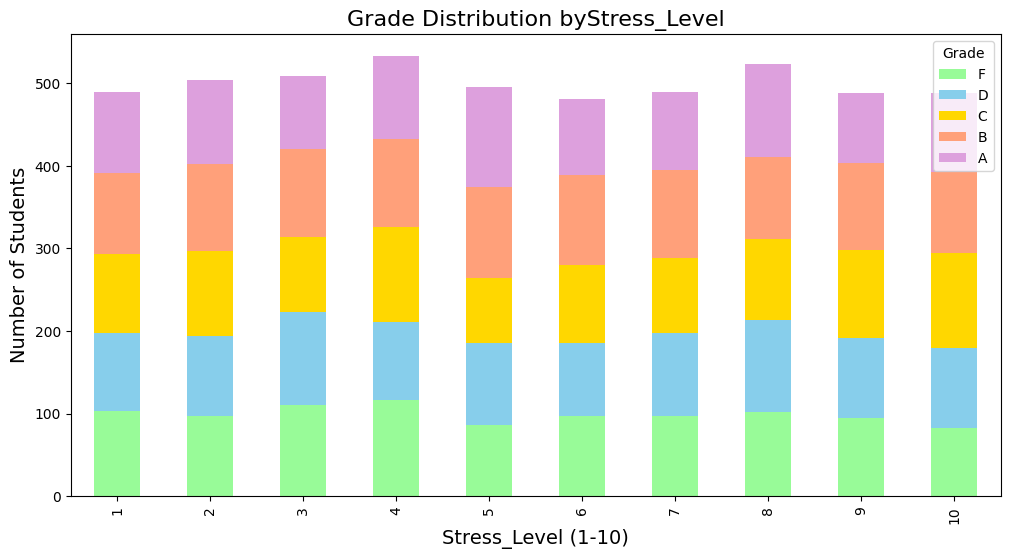

In [34]:
grade_by_department = df.groupby(['Stress_Level (1-10)', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution byStress_Level', fontsize=16)
plt.xlabel('Stress_Level (1-10)', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<ipython-input-35-f170552d11ae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Sleep_Hours_per_Night', 'Grade']).size().unstack()


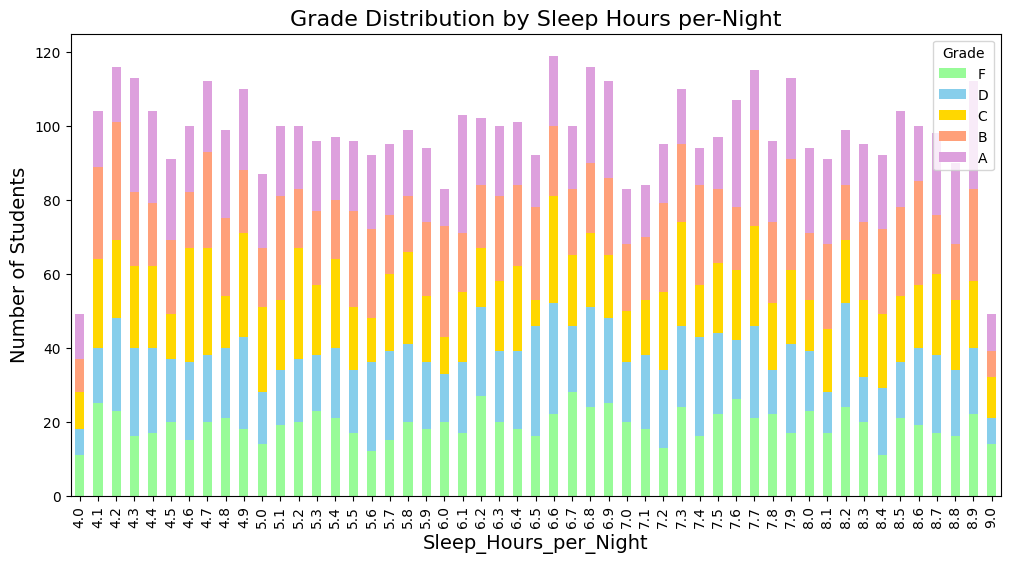

In [35]:
grade_by_department = df.groupby(['Sleep_Hours_per_Night', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution by Sleep Hours per-Night', fontsize=16)
plt.xlabel('Sleep_Hours_per_Night', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<ipython-input-36-5d6d70f802cf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grade_by_department = df.groupby(['Parent_Education_Level', 'Grade']).size().unstack()


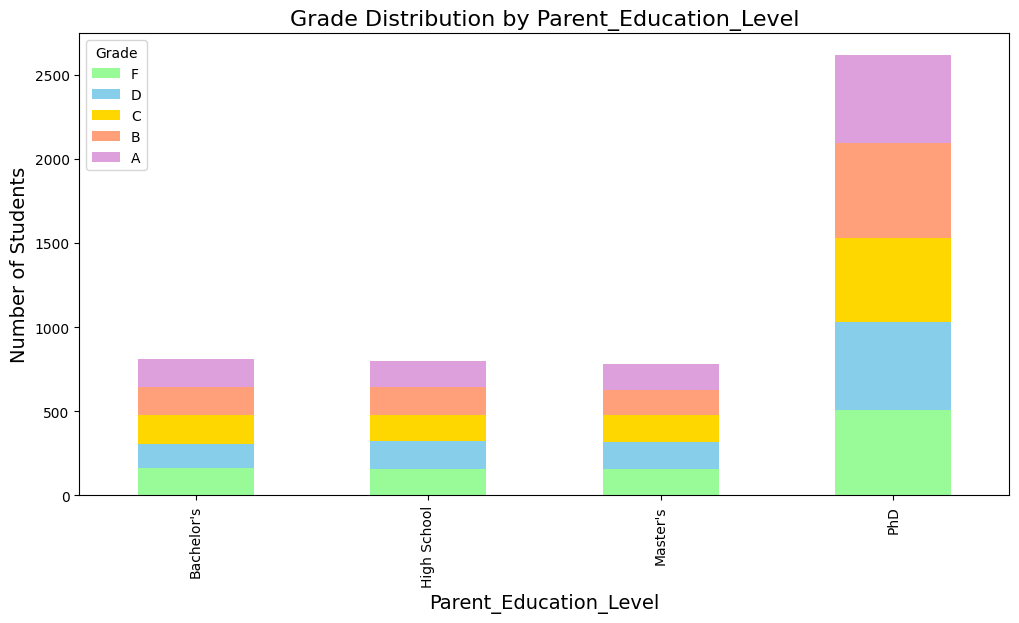

In [36]:
grade_by_department = df.groupby(['Parent_Education_Level', 'Grade']).size().unstack()

grade_by_department.plot(kind='bar', stacked=True, 
                         color=["#98FB98", "#87CEEB", "#FFD700", "#FFA07A", "#DDA0DD"], 
                         figsize=(12, 6))
plt.title('Grade Distribution by Parent_Education_Level', fontsize=16)
plt.xlabel('Parent_Education_Level', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Grade')
plt.show()

<hr>

### <center> <span style="font-family:Roboto Mono;">5.2.2 Features impact on Grade </span> <center/>

In [37]:
features = ['Midterm_Score', 'Final_Score', 'Attendance (%)', 'Assignments_Avg', 'Quizzes_Avg', 'Projects_Score', 'Participation_Score']
X = df[features]  
y = df['Total_Score']  

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.546
Date:                Wed, 05 Mar 2025   Prob (F-statistic):              0.147
Time:                        22:25:47   Log-Likelihood:                -20425.
No. Observations:                5000   AIC:                         4.087e+04
Df Residuals:                    4992   BIC:                         4.092e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  77.6670    

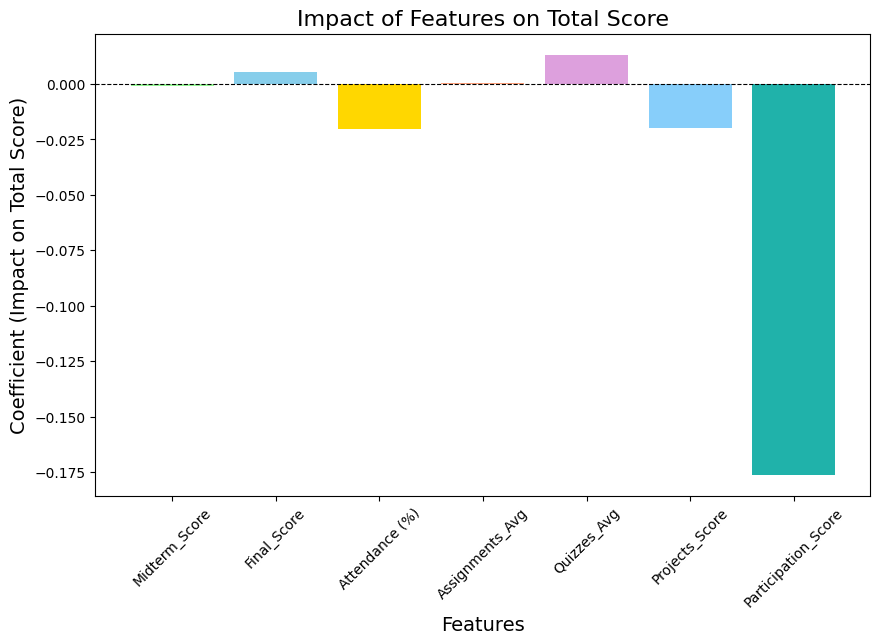

In [38]:
coefficients = model.params[1:]  # Exclude the intercept
feature_names = features

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients, color=['#98FB98', '#87CEEB', '#FFD700', '#FFA07A', '#DDA0DD', '#87CEFA', '#20B2AA'])
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Add a reference line at 0
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient (Impact on Total Score)', fontsize=14)
plt.title('Impact of Features on Total Score', fontsize=16)
plt.xticks(rotation=45)
plt.show()

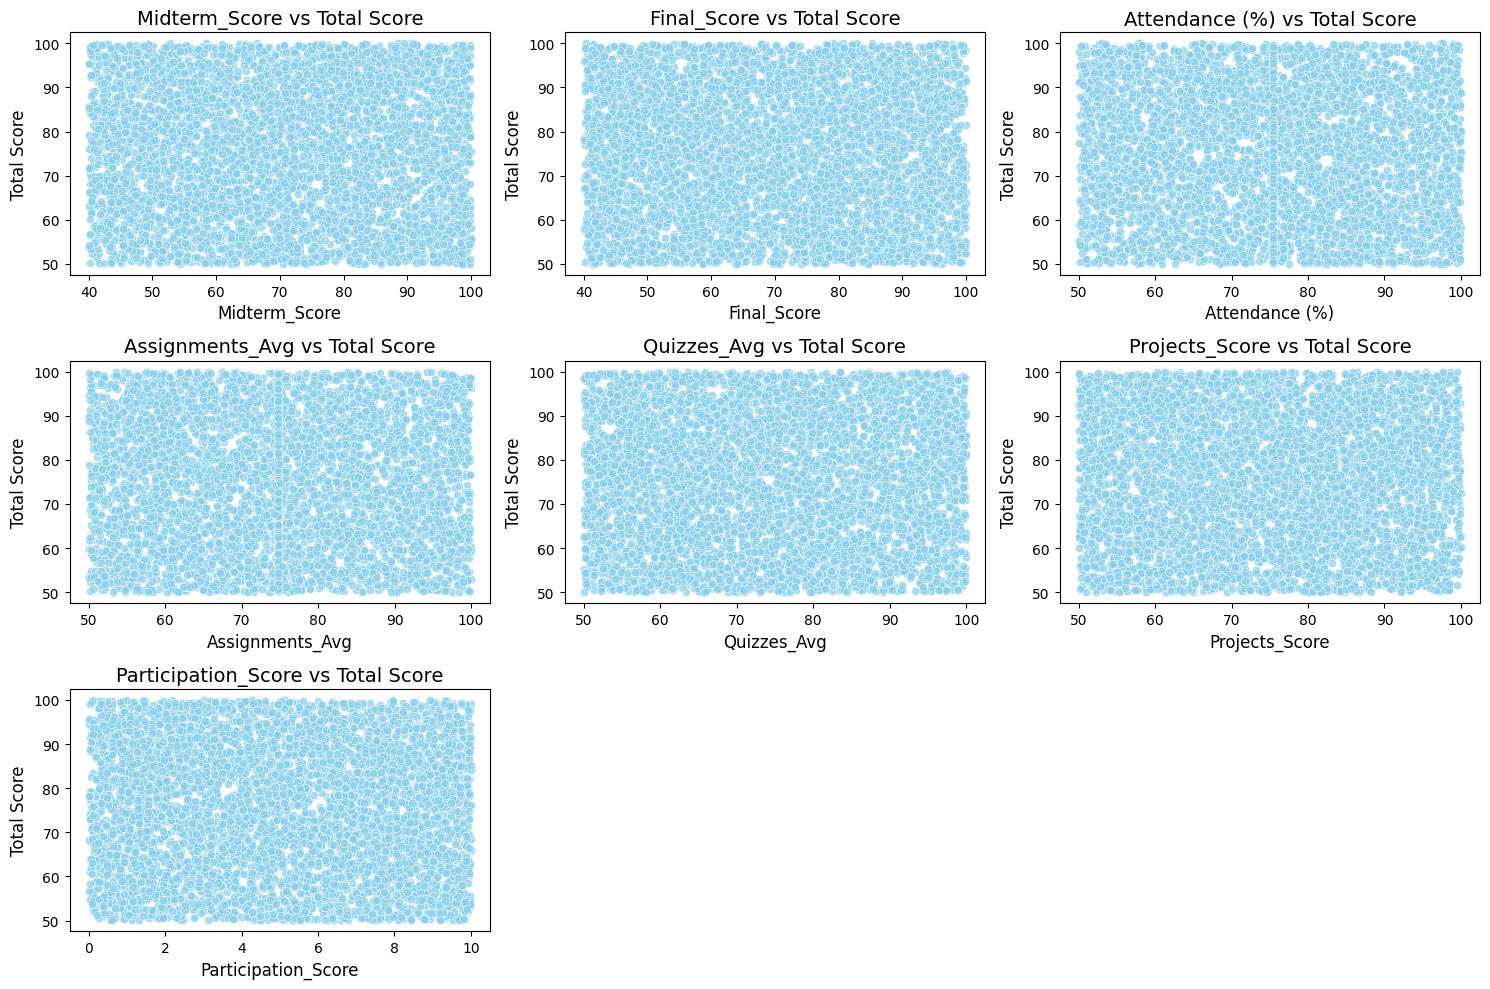

In [39]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df['Total_Score'], color='#87CEEB', alpha=0.7)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Total Score', fontsize=12)
    plt.title(f'{feature} vs Total Score', fontsize=14)

plt.tight_layout()
plt.show()

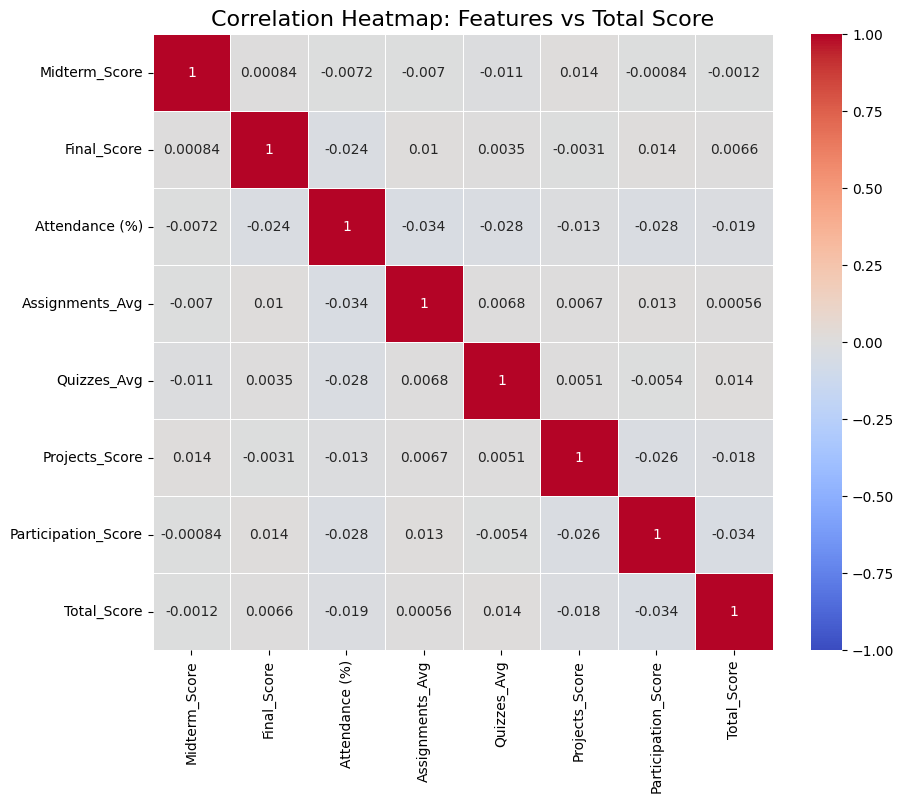

In [40]:
corr_features = features + ['Total_Score']

corr_matrix = df[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Features vs Total Score', fontsize=16)
plt.show()

<div class="alert alert-block alert-danger">  
<b>Note:</b>This distribution doesn't make sense , will fix it later on
</div>

<hr>

### <center> <span style="font-family:Roboto Mono;">5.3 Department-wise Analysis </span> <center/>

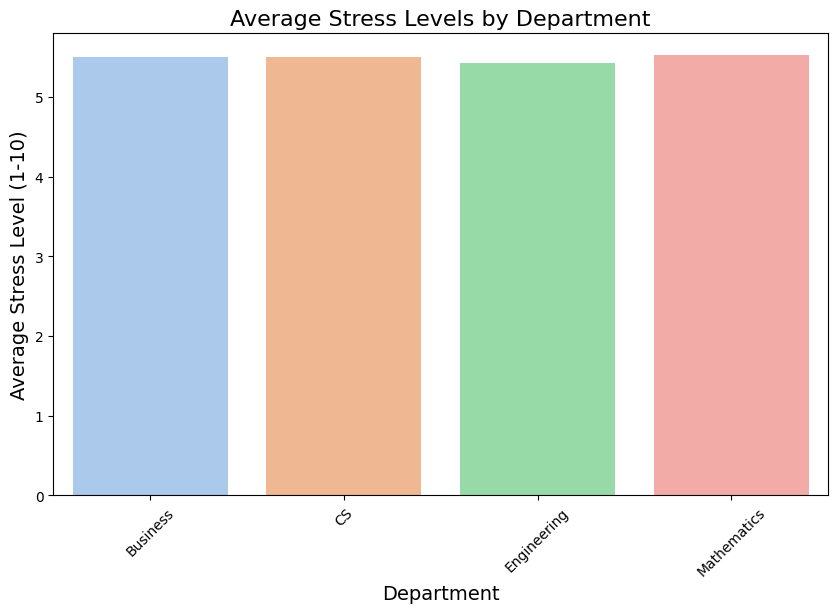

In [41]:
stress_by_department = df.groupby('Department')['Stress_Level (1-10)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Stress_Level (1-10)', data=stress_by_department, palette='pastel')
plt.title('Average Stress Levels by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Average Stress Level (1-10)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

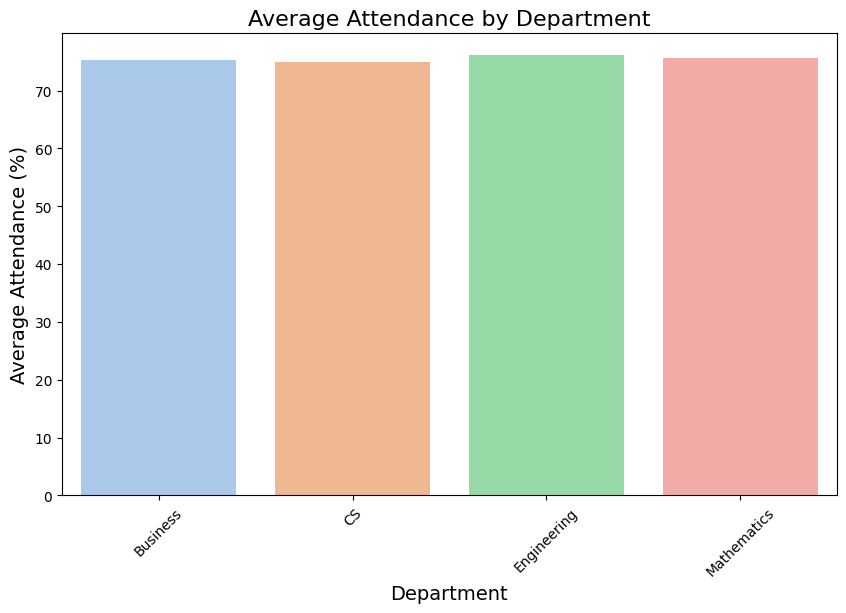

In [42]:
attendance_by_department = df.groupby('Department')['Attendance (%)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Attendance (%)', data=attendance_by_department, palette='pastel')
plt.title('Average Attendance by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Average Attendance (%)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### <center> <span style="font-family:Roboto Mono;">5.4 Student Welfare Analysis </span> <center/>

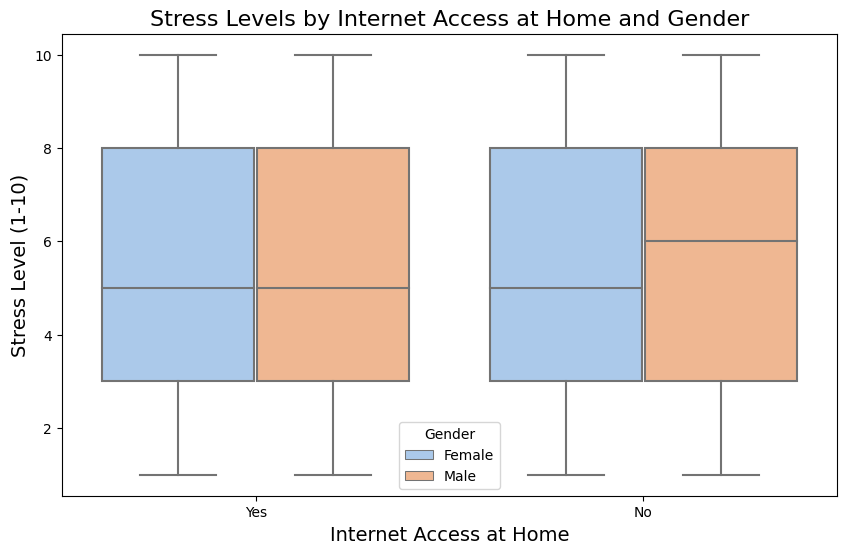

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Internet_Access_at_Home', y='Stress_Level (1-10)', hue='Gender', data=df, palette='pastel')
plt.title('Stress Levels by Internet Access at Home and Gender', fontsize=16)
plt.xlabel('Internet Access at Home', fontsize=14)
plt.ylabel('Stress Level (1-10)', fontsize=14)
plt.legend(title='Gender')
plt.show()

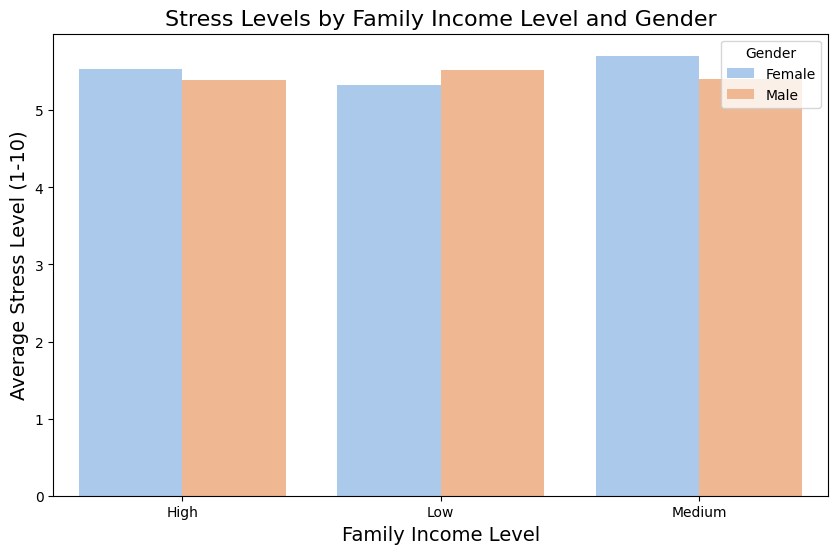

In [44]:
stress_by_income_gender = df.groupby(['Family_Income_Level', 'Gender'])['Stress_Level (1-10)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Family_Income_Level', y='Stress_Level (1-10)', hue='Gender', data=stress_by_income_gender, palette='pastel')
plt.title('Stress Levels by Family Income Level and Gender', fontsize=16)
plt.xlabel('Family Income Level', fontsize=14)
plt.ylabel('Average Stress Level (1-10)', fontsize=14)
plt.legend(title='Gender')
plt.show()

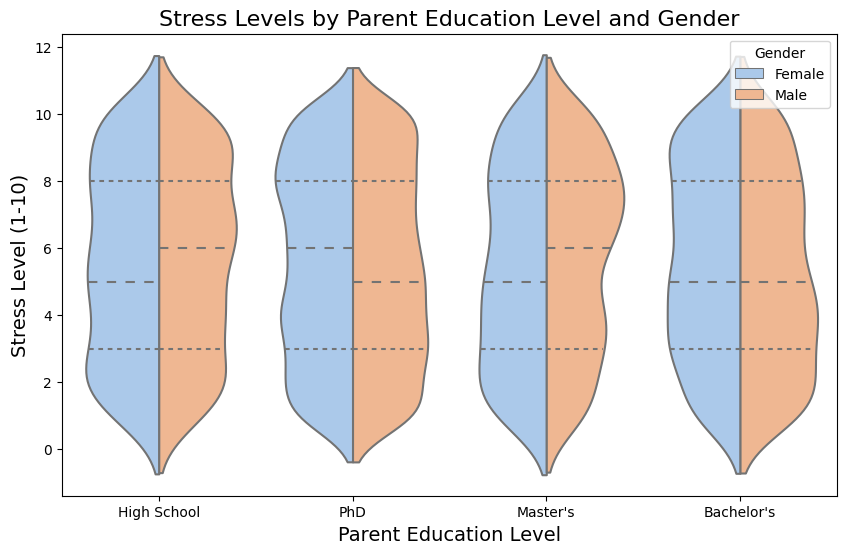

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Parent_Education_Level', y='Stress_Level (1-10)', hue='Gender', data=df, palette='pastel', split=True, inner='quartile')
plt.title('Stress Levels by Parent Education Level and Gender', fontsize=16)
plt.xlabel('Parent Education Level', fontsize=14)
plt.ylabel('Stress Level (1-10)', fontsize=14)
plt.legend(title='Gender')
plt.show()

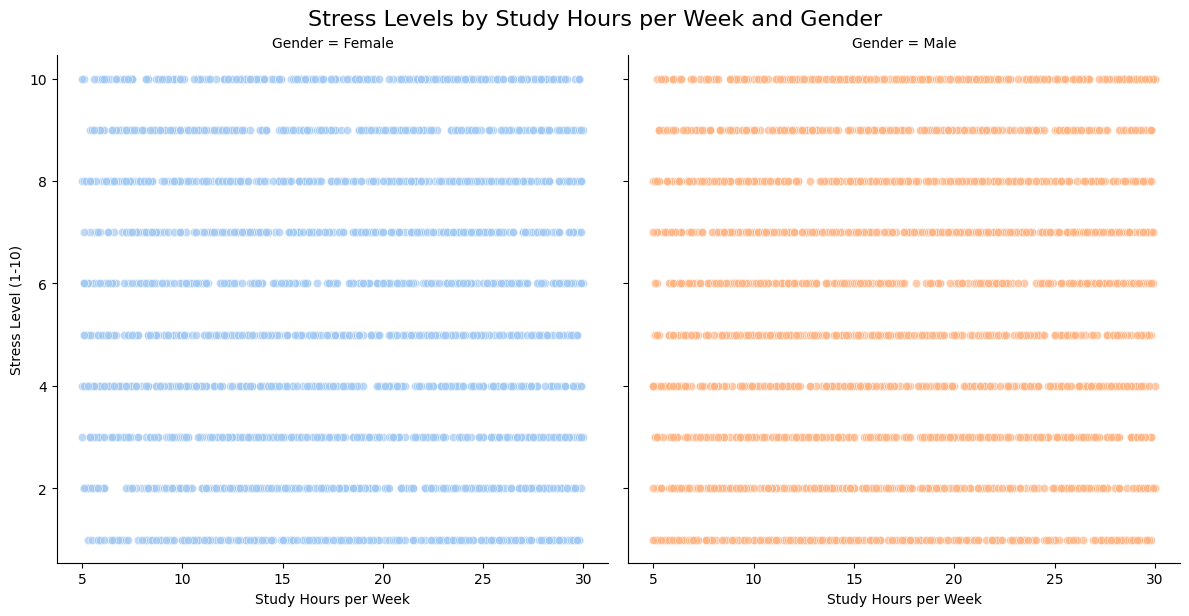

In [46]:
g = sns.FacetGrid(df, col='Gender', hue='Gender', palette='pastel', height=6)
g.map(sns.scatterplot, 'Study_Hours_per_Week', 'Stress_Level (1-10)', alpha=0.7)
g.set_axis_labels('Study Hours per Week', 'Stress Level (1-10)')
g.fig.suptitle('Stress Levels by Study Hours per Week and Gender', fontsize=16, y=1.02)
plt.show()

<hr>

# <center> <span style="font-family:Roboto Mono;">6.Correlation Analysis </span> <center/>

### <center> <span style="font-family:Roboto Mono;">6.1.Data Preprocessing </span> <center/>

### <center> <span style="font-family:Roboto Mono;">6.1.1Fixing inconsistencies</span> <center/>

**<center> <span style="font-family:Roboto Mono;">
    In this step , i will fix the weights of the features that compose the total score first according to these weights.
</span> <center/>**


\
\begin{array}{|l|c|}
\hline
\textbf{Metric} & \textbf{Weight (\%)} \\
\hline
\text{Attendance (\%)} & 5 \\
\text{Midterm Score} & 25 \\
\text{Final Score} & 30 \\
\text{Assignments Average} & 20 \\
\text{Quizzes Average} & 10 \\
\text{Projects Score} & 5 \\
\text{Participation Score} & \text{Kept as is (0-10)} \\
\hline
\end{array}



In [47]:
weights = {
    'Attendance (%)': 0.05,
    'Midterm_Score': 0.25,
    'Final_Score': 0.30,
    'Assignments_Avg': 0.20,
    'Projects_Score': 0.10,
    'Participation_Score': 1  
}

# Recalculate the Total_Score
df['Total_Score'] = (
    df['Attendance (%)'] * weights['Attendance (%)'] +
    df['Midterm_Score'] * weights['Midterm_Score'] +
    df['Final_Score'] * weights['Final_Score'] +
    df['Assignments_Avg'] * weights['Assignments_Avg'] +
    df['Projects_Score'] * weights['Projects_Score'] +
    df['Participation_Score'] * weights['Participation_Score']
)

### <center> <span style="font-family:Roboto Mono;">6.1.2 Encoding categorical values</span> <center/>

In [48]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))


print("\nMapping Dictionaries:")
for column, mapping in label_encoders.items():
    print(f"{column}: {mapping}")


Mapping Dictionaries:
Gender: {'Female': 0, 'Male': 1}
Department: {'Business': 0, 'CS': 1, 'Engineering': 2, 'Mathematics': 3}
Extracurricular_Activities: {'No': 0, 'Yes': 1}
Internet_Access_at_Home: {'No': 0, 'Yes': 1}
Parent_Education_Level: {"Bachelor's": 0, 'High School': 1, "Master's": 2, 'PhD': 3}
Family_Income_Level: {'High': 0, 'Low': 1, 'Medium': 2}


### <center> <span style="font-family:Roboto Mono;">6.2.Hypthesis Testing</span> <center/>

In [49]:
le = LabelEncoder()
df['Grade'] = le.fit_transform(df['Grade'])

In [50]:
#Perform T-Test for binary faetures
from scipy.stats import ttest_ind
binary_features = ['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities']
for feature in binary_features:
    # Encode binary features if not already encoded
    if df[feature].dtype == 'object':
        df[feature] = df[feature].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})
    
    group1 = df[df[feature] == 1]['Grade']  # Group 1 (e.g., Male, Yes)
    group2 = df[df[feature] == 0]['Grade']  # Group 2 (e.g., Female, No)
    
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"t-test for {feature}: t-statistic = {t_stat}, p-value = {p_value}")
    
    if p_value < 0.05:
        print(f"Significant difference in Grades between {feature} groups.\n")
    else:
        print(f"No significant difference in Grades between {feature} groups.\n")

t-test for Gender: t-statistic = 1.196659317744613, p-value = 0.23149612957377133
No significant difference in Grades between Gender groups.

t-test for Internet_Access_at_Home: t-statistic = 0.8523681476953389, p-value = 0.3940506347058309
No significant difference in Grades between Internet_Access_at_Home groups.

t-test for Extracurricular_Activities: t-statistic = -0.36988945545634944, p-value = 0.7114805304706887
No significant difference in Grades between Extracurricular_Activities groups.



In [51]:
categorical_features = ['Department', 'Parent_Education_Level', 'Family_Income_Level']

# Perform ANOVA for each categorical feature
for feature in categorical_features:
    # Group data by feature and extract Grades
    groups = [df[df[feature] == category]['Grade'] for category in df[feature].unique()]
    
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {feature}: F-statistic = {f_stat}, p-value = {p_value}")
    
    if p_value < 0.05:
        print(f"Significant difference in Grades across {feature} groups.\n")
    else:
        print(f"No significant difference in Grades across {feature} groups.\n")

ANOVA for Department: F-statistic = 0.9453365450910306, p-value = 0.4176911145526616
No significant difference in Grades across Department groups.

ANOVA for Parent_Education_Level: F-statistic = 0.39654909396220694, p-value = 0.7554937981162142
No significant difference in Grades across Parent_Education_Level groups.

ANOVA for Family_Income_Level: F-statistic = 1.6998893822034187, p-value = 0.18280936825535832
No significant difference in Grades across Family_Income_Level groups.



In [52]:
categorical_features = ['Gender', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Department', 'Parent_Education_Level', 'Family_Income_Level']

# Perform chi-square test for each categorical feature
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[feature], df['Grade'])
    
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature}: Chi-square statistic = {chi2}, p-value = {p_value}")
    
    if p_value < 0.05:
        print(f"Significant relationship between {feature} and Grade.\n")
    else:
        print(f"No significant relationship between {feature} and Grade.\n")

Chi-square test for Gender: Chi-square statistic = 4.733947631464258, p-value = 0.315701083199947
No significant relationship between Gender and Grade.

Chi-square test for Internet_Access_at_Home: Chi-square statistic = 3.6712690718848457, p-value = 0.45231845462042597
No significant relationship between Internet_Access_at_Home and Grade.

Chi-square test for Extracurricular_Activities: Chi-square statistic = 3.369800582300433, p-value = 0.4979494568431768
No significant relationship between Extracurricular_Activities and Grade.

Chi-square test for Department: Chi-square statistic = 10.589883362743352, p-value = 0.5643534382926825
No significant relationship between Department and Grade.

Chi-square test for Parent_Education_Level: Chi-square statistic = 8.754253368248042, p-value = 0.7237647827225004
No significant relationship between Parent_Education_Level and Grade.

Chi-square test for Family_Income_Level: Chi-square statistic = 5.715993692030551, p-value = 0.6790100606576492
No

### <center> <span style="font-family:Roboto Mono;">6.3.Feature Importance</span> <center/>

In [53]:
X = df.drop(columns=['Total_Score','Grade','Final_Score','Midterm_Score','Participation_Score','Assignments_Avg','Projects_Score','Attendance (%)','Quizzes_Avg'])
y = df['Grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

model = lgb.train(params, train_data, num_boost_round=100)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

importance = model.feature_importance(importance_type='split')
feature_names = model.feature_name()
feature_importance = dict(zip(feature_names, importance))
print("Feature Importance:", feature_importance)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 10
[LightGBM] [Info] Start training from score 1.990000
Mean Squared Error: 2.133181558935264
Feature Importance: {'Gender': 133, 'Age': 269, 'Department': 157, 'Study_Hours_per_Week': 1033, 'Extracurricular_Activities': 52, 'Internet_Access_at_Home': 47, 'Parent_Education_Level': 201, 'Family_Income_Level': 156, 'Stress_Level_(1-10)': 345, 'Sleep_Hours_per_Night': 607}


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


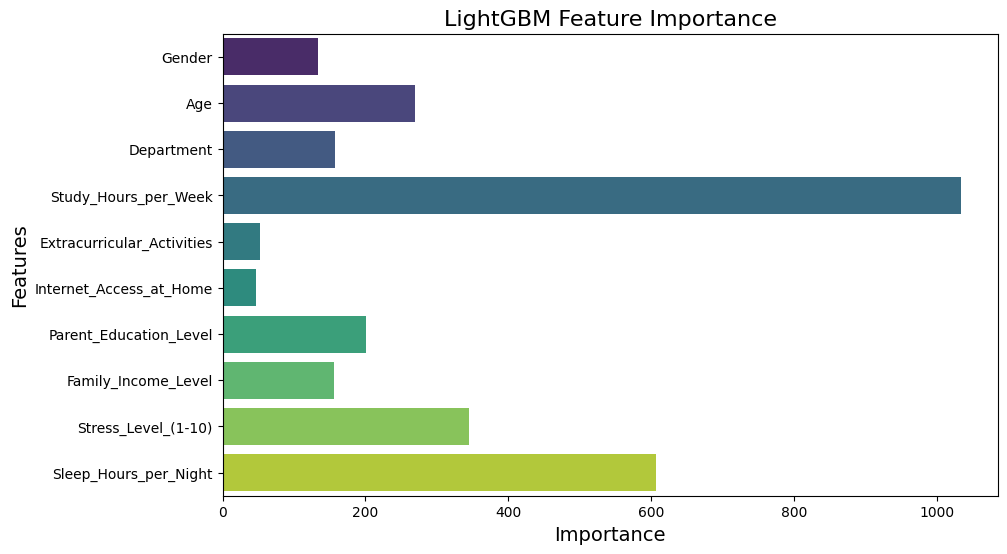

In [54]:
lgb_importance = model.feature_importance(importance_type='split')
lgb_feature_names = model.feature_name()
lgb_feature_importance = dict(zip(lgb_feature_names, lgb_importance))

plt.figure(figsize=(10, 6))
sns.barplot(x=list(lgb_feature_importance.values()), y=list(lgb_feature_importance.keys()), palette='viridis')
plt.title('LightGBM Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

**To better understand this we will use SHAP**
SHAP (SHapley Additive exPlanations) is a powerful tool for interpreting machine learning models. While feature importance tells us which features matter, SHAP explains how they impact predictions—both positively and negatively.

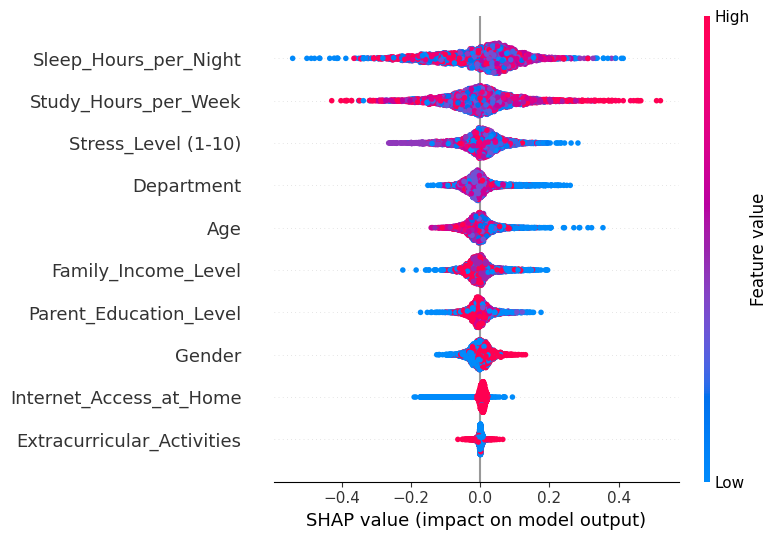

In [55]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)